# K-Means Clustering
---

K-Means Clustering is an *unsupervised* machine learning algorithm that takes *unlabeled feature vectors* and attempts to group them according to similarities in the feature data in order to predict the labelled groups. This algorithm functions by creating $k$ random *centroids*, or points outside of the data, and calculating the distance from these *centroids* to every point in the data set using the distance formula:
$$d(p_1,p_2)=\sqrt{(x_{p_1}-x_{p_2})^2+(y_{p_1}-y_{p_2})^2}$$

Once this is done, the algorithm groups the data into $k$ groups based on which *centroid* they are closest to. The groups are given the labels $S^i$ to correspond to the closest *centroid*, $C^i$. After the data has been clustered, the *centroids* are then updated by taking the mean of all the entries in their clusters according to the following formula: $$C^{(i)}_j=\frac{1}{|S_i|}\sum_{x\in S_i}x_j$$

The distance between *centroids* and the data is then recalculated and the data is regrouped according to shortest distances. This process will be repeated until eventually the *centroids* will cease to siginificantly change when updated. It is at this point that the K-Means clustering algorithm has finished, and the clusters are finalized.

---
---

## Application

---
Before we get started, we will need to load the packages we will be using.

In [14]:
using Statistics
using Plots

---
The first step in the K-means algorithm is determining the distance between the centroids and the data. To accomplish this we will create two functions. The first function, ***distance***, will be used to calculate the distance between two points using the distance formula:
$$d(p_1,p_2)=\sqrt{(x_{p_1}-x_{p_2})^2+(y_{p_1}-y_{p_2})^2}$$ 
The second function, ***km_distance***, will apply the distance formula to each point in the data with respect to the *centroids* and store all the calculated values in a dictionary.

In [26]:
# Calculate distance formula
function distance(p1,p2)
    return sqrt(sum([(p1[i]-p2[i])^2 for i =1:length(p1)]))
end

# Calculate distance b/w centroids and data
function km_distance(X, centroids, k)
    distances = Dict()
    for p in X
        temp_dict = Dict()
        for i = 1:k
            temp_dict[i] = distance(p, centroids[i])
        end
        distances[p] = temp_dict
    end
    return distances
end

km_distance (generic function with 1 method)

---
Now that we have functions to calculate all of the distances between the *centroids* and the data, we can now group the data according to shortest distance to a *centroid*.

In [21]:
function km_clusters(X, centroids , k)
    distances = km_distance(X, centroids , k)
    clusters = Dict()
    for p in X
        clusters[p] = 1
        min_d = distances[p][1]
        for i = 2:k
            if distances[p][i] < min_d
                clusters[p] = i
                min_d = distances[p][i]
                end 
            end 
        end 
    return clusters
end

km_clusters (generic function with 1 method)

---
With the data now clustered, we can use the clustered data to update our centroids. This will be done using the update formula described before:
$$C^{(i)}_j=\frac{1}{|S_i|}\sum_{x\in S_i}x_j$$


In [22]:
function km_update(X,centroids, k)
    clusters = km_clusters(X,centroids,k)
    new_centers = []
    for j = 1:k
        x = mean([p[1] for p in keys(clusters) if clusters[p] == j])
        y = mean([p[2] for p in keys(clusters) if clusters[p] == j])
        point = (x,y)
        push!(new_centers, point)
        end 
    return new_centers
end

km_update (generic function with 1 method)

---
With our functions all written, we can now generate some data and random centroids to run the algorithm on.

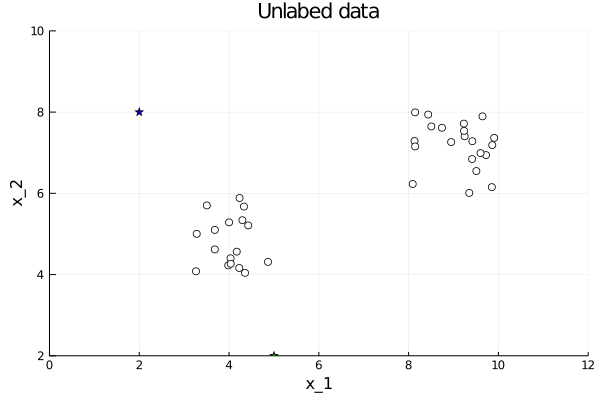

In [23]:
# Generate random  clustered data
function circleShape(h,k,r)
    θ = LinRange(0,2*π, 500)
    return h.+r*sin.(θ), k.+ r*cos.(θ)
    end 

cluster1 = [(4 + (-1)^rand(1:2)*rand(), 5 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:17]
cluster2 = [(9 + (-1)^rand(1:2)*rand(), 7 + (-1)^rand(1:2)*rand(1:1.5)*rand()) for _ = 1:21]

# Combine data into a single data set
data = copy(cluster1)
for x in cluster2
    push!(data,x)
end

# Plot data
scatter(data, color = "white",
    legend = false, 
    xlabel = "x_1", 
    xlim = (0,12), 
    ylabel = "x_2",
    ylim = (2,10),
    title = "Unlabed data")

# Create random centroids
centroids = [(rand(1:10),rand(1:10)),(rand(1:10),rand(1:10))]

# Plot centroids
scatter!([centroids[1]], color = "green", shape = :star5)
scatter!([centroids[2]], color = "blue", shape = :star5)

When we run our clustering function on the above data and centroids, we get the following clusters:

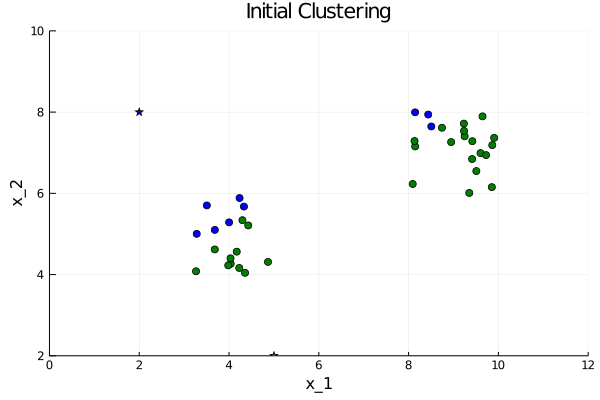

In [29]:
clusters = km_clusters(data, centroids, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "Initial Clustering")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "green", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids[1]], color = "green", shape = :star5)
scatter!([centroids[2]], color = "blue", shape = :star5)

From here we can run our update function to get new centroids and adjust our clustering.

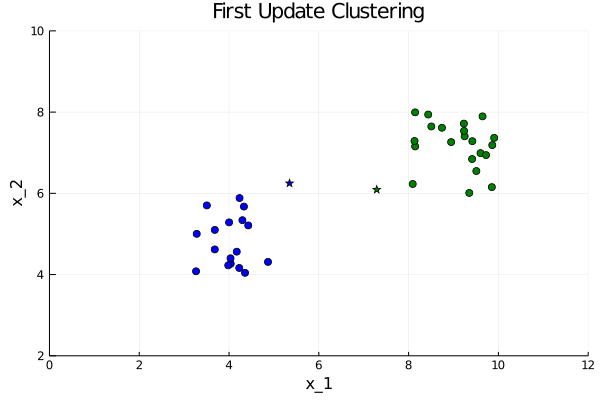

In [31]:
centroids_update1 = km_update(data, centroids, 2)

clusters = k_mean_clusters(data,centroids_update1, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "First Update Clustering")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "green", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_update1[1]], color = "green", shape = :star5)
scatter!([centroids_update1[2]], color = "blue", shape = :star5)

Even after only one update, the two separate clusters are all being completely assigned to separate centroids. However, in order to better train the model so it can better predict future data we will want to run this multiple times to get better centering of our centroids.

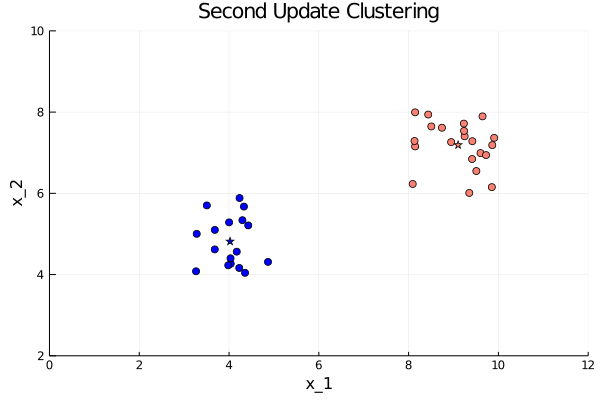

In [34]:
centroids_update2 = km_update(data, centroids_update1, 2)
clusters = k_mean_clusters(data,centroids_update2, 2)

plot(legend = false,
    xlim=(0,12),
    xlabel = "x_1", 
    ylim=(2,10),
    ylabel = "x_2",
    title = "Second Update Clustering")

scatter!([x for x in keys(clusters) if clusters[x] == 1], color = "salmon", legend = false)
scatter!([x for x in keys(clusters) if clusters[x] == 2], color = "blue", legend = false)

scatter!([centroids_update2[1]], color = "salmon", shape = :star5)
scatter!([centroids_update2[2]], color = "blue", shape = :star5)

After the second update for this data, an additional update won't  change the centroids since there will not be any change in the clustering for the data. This means that the K-Means algorithm has completed its run until new data is introduced.